In [1]:
from create_dataset import norm01, Dataset_wrap, SkinClasDataset, Dataset_wrap_csv
import torch
import torchvision 
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import os
import json
sys.path.append('/ubc/ece/home/ra/grads/siyi/Research/skin_lesion_segmentation/skin-lesion-segmentation-transformer')

In [11]:
'''
check if train val test sets have overlapping
'''
data_folder='/bigdata/siyiplace/data/skin_lesion'
dataset_name = 'PH2'
data_path = '{}/{}/'.format(data_folder, dataset_name)
split_ratio = [0.6, 0.2, 0.2]
train_path_list = json.load(open(data_path+'train_path_list_{}.json'.format(int(split_ratio[0]*100)), 'r'))
val_path_list = json.load(open(data_path+'val_path_list_{}.json'.format(int(split_ratio[1]*100)), 'r'))
test_path_list = json.load(open(data_path+'test_path_list_{}.json'.format(int(split_ratio[2]*100)), 'r'))
train_path_set, val_path_set, test_path_set = set(train_path_list), set(val_path_list), set(test_path_list)
print(train_path_set & val_path_set)
print(train_path_set & test_path_set)
print(val_path_set & test_path_set)

In [19]:
dataset = Dataset_wrap_csv(dataset_name='isic2018', img_size=256, train_aug=True)
# print(dataset[0]['image_path'])
train_loader = torch.utils.data.DataLoader(dataset['train'],
                                            batch_size=6,
                                            shuffle=True,
                                            num_workers=2,
                                            pin_memory=True,
                                            drop_last=True)

isic2018 has 2594 samples, 1556 are used to train, 519 are used to val, 519 are used to test. 
 The split ratio is [0.6, 0.2, 0.2]


In [73]:
'''
check SkinClassDataset
'''
dataset = SkinClasDataset('SKD', 512)
# print(dataset[0]['image_path'])
train_loader = torch.utils.data.DataLoader(dataset,
                                            batch_size=3,
                                            shuffle=True,
                                            num_workers=2,
                                            pin_memory=True,
                                            drop_last=True)
# batch = next(iter(train_loader))

In [59]:
# test isic2018
datasets = Dataset_wrap(use_old_split=True, dataset_name='DMF', train_aug=True)
train_set, test_set = datasets['train'], datasets['test']
train_loader = torch.utils.data.DataLoader(train_set,
                                            batch_size=3,
                                            shuffle=True,
                                            num_workers=2,
                                            pin_memory=True,
                                            drop_last=True)
# batch = next(iter(train_loader))
# img, label = batch['image'], batch['label']
# print(img.shape, label.shape)


DMF has 1300 samples, 780 are used to train, 260 are used to val, 260 are used to test. 
 The split ratio is [0.6, 0.2, 0.2]


In [5]:
dataset_list = ['isic2018','PH2','DMF','SKD']
train_data_list, val_data_list, test_data_list = [], [], []
for dataset_name in dataset_list:
    datas = Dataset_wrap(use_old_split=True, img_size=256, dataset_name = dataset_name, 
    train_aug=True)
    train_data_list.append(datas['train'])
    val_data_list.append(datas['val'])
    test_data_list.append(datas['test'])
train_data = torch.utils.data.ConcatDataset(train_data_list)
train_loader = torch.utils.data.DataLoader(train_data,
                                            batch_size=8,
                                            shuffle=True,
                                            num_workers=2,
                                            pin_memory=True,
                                            drop_last=True)

isic2018 has 2594 samples, 1556 are used to train, 519 are used to val, 519 are used to test. 
 The split ratio is [0.6, 0.2, 0.2]
PH2 has 200 samples, 120 are used to train, 40 are used to val, 40 are used to test. 
 The split ratio is [0.6, 0.2, 0.2]
DMF has 1300 samples, 780 are used to train, 260 are used to val, 260 are used to test. 
 The split ratio is [0.6, 0.2, 0.2]
SKD has 206 samples, 123 are used to train, 41 are used to val, 42 are used to test. 
 The split ratio is [0.6, 0.2, 0.2]


In [12]:
c='adapt'
print(c in 'UFAT_aapt')

False


In [20]:
loader = iter(train_loader)

image shape (3, 256, 256) label shape (1, 256, 256)
/bigdata/siyiplace/data/skin_lesion/isic2018/Image/0016072.npy
tensor(0)
Nevus
tensor(1)


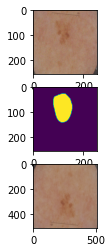

In [26]:
# show image and label, check correspondence
batch = next(loader)
img, label, image_path, domain, set_name = batch['image'], batch['label'], batch['image_path'], batch['set_id'], batch['set_name']
id = 2
img_np, label_np = img[id].numpy(), label[id].numpy()
print('image shape {} label shape {}'.format(img_np.shape,label_np.shape))
mean=[0.485, 0.456, 0.406]
std=[0.229, 0.224, 0.225]
# de-normalize
img_from_norm = np.zeros_like(img_np)
for i in range(3):
    img_from_norm[i] = img_np[i]*std[i]+mean[i]
img_show, label_show = np.transpose(img_from_norm, (1,2,0)), np.transpose(label_np, (1,2,0))
# print(img_show)
plt.subplot(3,1,1)
plt.imshow(img_show)
plt.subplot(3,1,2)
plt.imshow(label_show)
plt.subplot(3,1,3)
origin_img = np.load(image_path[id])
plt.imshow(origin_img)
print(image_path[id])
print(domain[id])
print(batch['diagnosis'][id])
print(batch['DC_id'][id])

In [10]:
set_name

['DMF',
 'isic2018',
 'SKD',
 'isic2018',
 'isic2018',
 'isic2018',
 'isic2018',
 'isic2018']

In [41]:
SKD_images_folder = '/bigdata/siyiplace/data/skin_lesion/skin_cancer_detection'
SKD_images_path1 = '{}/skin_image_data_set-1/Skin Image Data Set-1/skin_data/melanoma/dermis'.format(SKD_images_folder)
path_list = os.listdir(SKD_images_path1)

FileNotFoundError: [Errno 2] No such file or directory: '/bigdata/siyiplace/data/skin_lesion/skin_cancer_detection/skin_image_data_set-1/Skin Image Data Set-1/skin_data/melanoma/dermis'

In [29]:
label_path = os.path.join(SKD_images_path1, path_list[1][:-8]+'orig.jpg')
print(label_path)

/bigdata/siyiplace/data/skin_lesion/skin_cancer_detection/skin_image_data_set-1/Skin Image Data Set-1/skin_data/melanoma/dermis/AMM1_orig.jpg


In [40]:
label = plt.imread(label_path)
plt.imshow(label)
print(label.shape)
print(label)

FileNotFoundError: [Errno 2] No such file or directory: '/bigdata/siyiplace/data/skin_lesion/skin_cancer_detection/skin_image_data_set-1/Skin Image Data Set-1/skin_data/melanoma/dermis/AMM1_orig.jpg'

In [3]:
DMF_images_folder = '/bigdata/siyiplace/data/skin_lesion/DMF_origin'
DMF_images_path = '{}/images'.format(DMF_images_folder)
path_list = os.listdir(DMF_images_path)
path = path_list[0]
image_path = os.path.join(DMF_images_path, path,
                            path + '.png')

In [ ]:
label = plt.imread(image_path)
plt.imshow(label)
print(label)

In [5]:
print(label.max(), label.min())

0.91764706 0.0


255 65


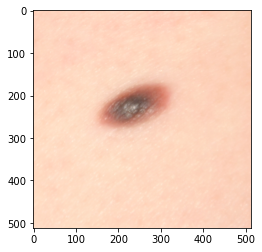

In [6]:
path = '/bigdata/siyiplace/data/skin_lesion/DMF/Image/D678.npy'
img = np.load(path)
plt.imshow(img)
print(img.max(), img.min())

In [11]:
'''
check numpy datasets
'''
DMF_images_folder = '/bigdata/siyiplace/data/skin_lesion/SKD'
DMF_images_path = '{}/Image'.format(DMF_images_folder)
path_list = os.listdir(DMF_images_path)
for i in range(len(path_list)):
    np_array = np.load(os.path.join(DMF_images_path, path_list[i]))
    if np_array.max() < 2 or np_array.max() > 255:
        print('warning max is {}, image path {}'.format(np_array.max(), path_list[i]))